<a href="https://colab.research.google.com/github/akhundMurad/MachineLearning/blob/main/practice/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

In [ ]:
!pip install --upgrade keras

## Ones and Zeros

In [5]:
import tensorflow as tf

zeros_vector = tf.zeros(shape=(2,))
print(zeros_vector)

ones_vector = tf.ones(shape=(2,5))
print(ones_vector)

zeros_matrix = tf.zeros(shape=(2, 1))
print(zeros_matrix)

ones_matrix = tf.ones(shape=(2, 1))
print(ones_matrix)

tf.Tensor([0. 0.], shape=(2,), dtype=float32)
tf.Tensor([1. 1.], shape=(2,), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


## Normal and Uniform Distribution

In [ ]:
normal_distributed = tf.random.normal(shape=(2, 1), mean=0, stddev=1)
print(normal_distributed)

uniform_distributed = tf.random.uniform(shape=(2, 1), minval=0, maxval=1)
print(uniform_distributed)

## Tensors in Tensorflow are immutable

In [ ]:
x = tf.ones(shape=(2, 2))
x[0, 1] = 5

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

## Tensorflow Variables

In [ ]:
initial_tensor = tf.random.normal(shape=(3, 2))

v = tf.Variable(initial_value=initial_tensor)
print(v.numpy())

v[0, 1].assign(3.)
print(v.numpy())

v.assign(tf.ones(shape=(3, 2)))
print(v.numpy())

[[ 1.200856    1.4772687 ]
 [-0.8928405  -0.9265728 ]
 [-0.8341277  -0.37437934]]
[[ 1.200856    3.        ]
 [-0.8928405  -0.9265728 ]
 [-0.8341277  -0.37437934]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


## Math operations on Tensors
The following operations are executed immediately. We call it *eager execution*.

In [8]:
a = tf.ones(shape=(4, 4))
b = tf.ones(shape=(4, 4))

# Square:
a_square = tf.square(a)
print("Square: ", a_square)

# Square root:
b_root = tf.sqrt(b)
print("Square root: ", b_root)

# Elementwise addition:
c = a + b
print("Elementwise addition: ", c)

# Tensors multiplication:
d = tf.matmul(a, b)
print("Tensors multiplication: ", d)

# Elementwise multiplication:
d *= c
print("Elementwise multiplication: ", d)

Square:  tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(4, 4), dtype=float32)
Square root:  tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(4, 4), dtype=float32)
Elementwise addition:  tf.Tensor(
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]], shape=(4, 4), dtype=float32)
Tensors multiplication:  tf.Tensor(
[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]], shape=(4, 4), dtype=float32)
Elementwise multiplication:  tf.Tensor(
[[8. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]], shape=(4, 4), dtype=float32)


## GradientTape

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

# Tensor-constant
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

# Gradient of gradient
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(f"Speed = {speed}, acceleration = {acceleration}")

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
Speed = 0.0, acceleration = 9.800000190734863


## Implementing linear classifier
Linear classifier - is a affine transformation (prediction = W * input + b), trained to minimize square of the substitution of predictions and targets.

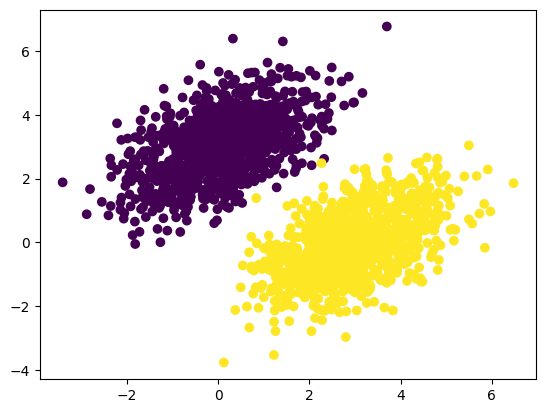

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create two random point sets on the two dimensional space:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
  mean=[0, 3],
  cov=[[1, 0.5], [0.5, 1]],
  size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
  mean=[3, 0],
  cov=[[1, 0.5], [0.5, 1]],
  size=num_samples_per_class
)

# Combine two point classes into one array:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Create target labels array:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

# Show point classes on the plane:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


Loss at step 0: 1.1839
Loss at step 1: 0.2331
Loss at step 2: 0.1239
Loss at step 3: 0.1026
Loss at step 4: 0.0939
Loss at step 5: 0.0875
Loss at step 6: 0.0818
Loss at step 7: 0.0767
Loss at step 8: 0.0721
Loss at step 9: 0.0679
Loss at step 10: 0.0641
Loss at step 11: 0.0606
Loss at step 12: 0.0574
Loss at step 13: 0.0545
Loss at step 14: 0.0519
Loss at step 15: 0.0495
Loss at step 16: 0.0473
Loss at step 17: 0.0453
Loss at step 18: 0.0435
Loss at step 19: 0.0419
Loss at step 20: 0.0404
Loss at step 21: 0.0390
Loss at step 22: 0.0378
Loss at step 23: 0.0367
Loss at step 24: 0.0357
Loss at step 25: 0.0347
Loss at step 26: 0.0339
Loss at step 27: 0.0331
Loss at step 28: 0.0324
Loss at step 29: 0.0318
Loss at step 30: 0.0312
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0297
Loss at step 34: 0.0294
Loss at step 35: 0.0290
Loss at step 36: 0.0287
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0278


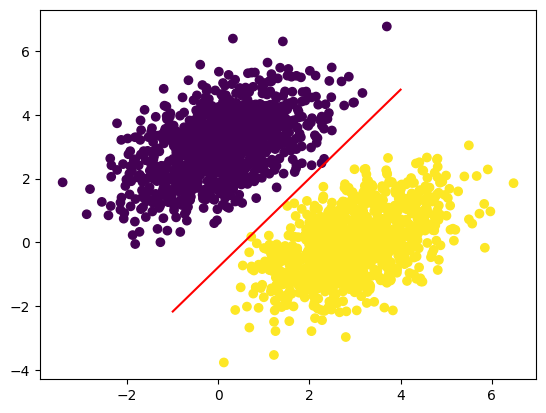

In [13]:
# Create variables for linear classifier
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Forward propogation
def model(inputs):
  return tf.matmul(inputs, W) + b

# Loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Training step
def training_step(inputs, targets):
  learning_rate = 0.1
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss, predictions

# Package learning loop
for step in range(40):
  loss, predictions = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

# Draw a deviding line
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)